In [4]:
import json
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import cPickle as pickle
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.feature_extraction import DictVectorizer

In [5]:
training_file = "/home/local/shalaby/bm25_training_sample_0.003.json"
doc_classifications_map_file = "/home/local/shalaby/doc_classification_map.pkl"
sections_file = "/home/local/shalaby/sections.pkl"

In [6]:
doc_classifications_map = pickle.load(open(doc_classifications_map_file))
sections = pickle.load(open(sections_file))
#open(sections_file).read()

In [7]:
def cosine(a, b):
    return dot(a, b.T)[0, 0] / (norm2(a) * norm2(b))

def norm2(v):
    return sqrt((v.data ** 2).sum())

In [8]:
doc_classifications_map.items()[0]

(u'08369259', [u'H', u'H-04', u'H-04-L'])

In [9]:
data = []

In [10]:
doc_ids = []

In [11]:
i = 0
with open(training_file, 'r') as f:
    for line in f:
        # print map(lambda (doc_id, postings): (doc_id, {int(k):postings[k] for k in postings}), json.loads(f.readline()))
        # print map(lambda doc: (doc[0], {int(k):doc[1][k] for k in doc[1]}) , json.loads(f.readline()))
        # print map(lambda doc: len(doc) , json.loads(f.readline()))
        (doc_id, postings) = json.loads(line)
        doc_ids.append(doc_id)
        i+=1
        if i%10000 == 0: print i
        #print (doc_id, {int(k):postings[k] for k in postings})
        data.append(postings)

10000
20000


In [12]:
len(data)

28866

In [37]:
print doc_ids[4208], doc_ids[1608]

08817764 08817765


In [13]:
v = DictVectorizer(sparse=False)

In [ ]:
%%time
X = v.fit_transform(data)

CPU times: user 14.7 s, sys: 2.58 s, total: 17.3 s
Wall time: 17.2 s


In [15]:
X.shape

(63683, 10000)

In [ ]:
X

array([[ 0.        ,  0.        ,  2.13416606, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.30194597, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
%%time
Z = linkage(X, 'ward')

### Using condensed distance matrix

In [ ]:
%%time
from scipy.spatial.distance import pdist
cdist = pdist(X)
pickle.dump(cdist, open('/home/local/shalaby/pdistance_0.006.pkl','w'))

CPU times: user 3h 39min 53s, sys: 22min 22s, total: 4h 2min 16s
Wall time: 4h 2min 5s


In [ ]:
cdist.shape

(2027730403,)

In [4]:
cdist = pickle.load(open('/home/local/shalaby/pdistance_0.008.pkl','r'))

In [ ]:
%%time
linkageMatrix = linkage(cdist, method="single")

In [1]:
Z

NameError: name 'Z' is not defined

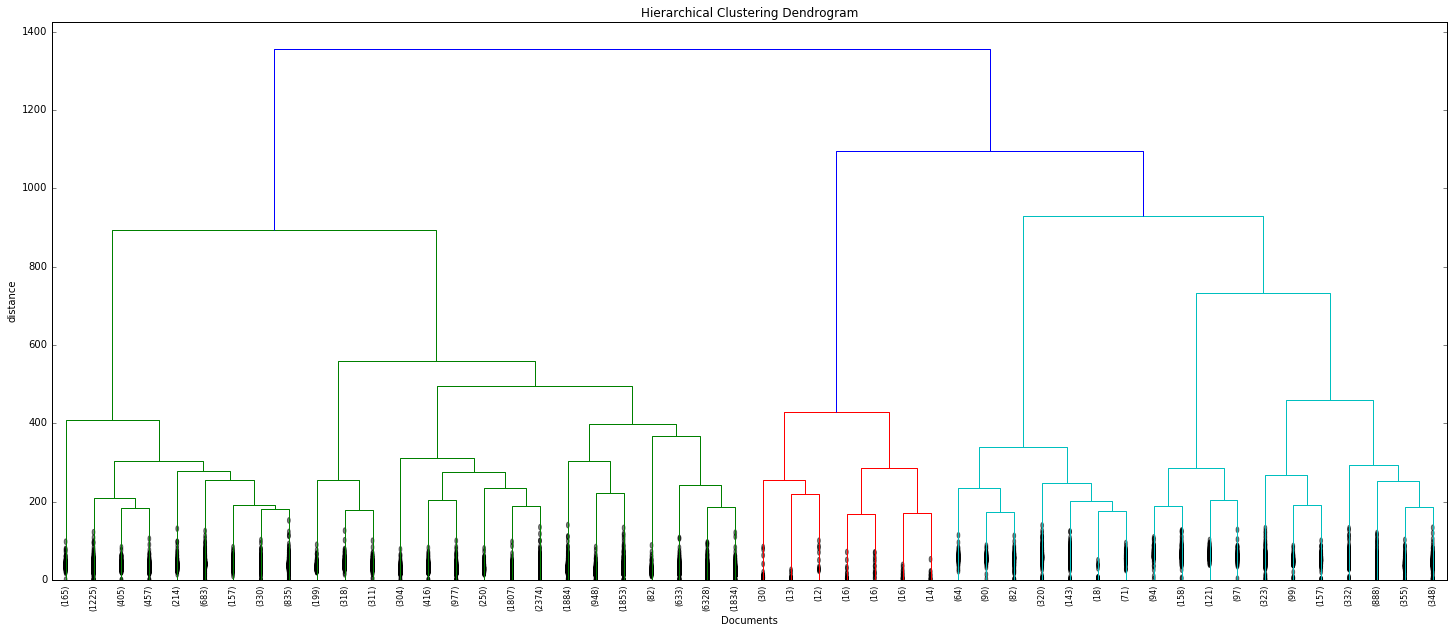

In [17]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Documents')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=50,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    show_contracted=True
)
plt.show()

In [18]:
max_d = 600
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, ..., 2, 2, 4], dtype=int32)

In [19]:
cluster_classes = {}
for i in np.unique(clusters):
    cluster_classes[i] = []

In [20]:
for index, cluster_number in enumerate(clusters):
    doc_id = doc_ids[index]
    cluster_classes[cluster_number].extend(doc_classifications_map[doc_id])

In [21]:
from collections import Counter

In [22]:
cluster_classes_counters = {}
for cluster_number in cluster_classes:
    cluster_classes_counters[cluster_number] = Counter(cluster_classes[cluster_number])

In [26]:
for k,v in cluster_classes_counters.items():
    print "========Cluster: " + str(k) 
    for vv in v:
        if len(vv) == 1:
            print "%s: %d" % (vv, v[vv])

========Cluster: 1
F: 45
A: 158
G: 3070
B: 118
H: 1980
C: 27
D: 3
E: 11
========Cluster: 2
A: 2958
B: 5445
C: 1577
D: 609
E: 774
F: 2631
G: 6385
H: 5963
========Cluster: 3
A: 117
C: 110
========Cluster: 4
D: 11
C: 686
G: 125
B: 5
F: 1
H: 1
A: 449
========Cluster: 5
B: 1
A: 426
C: 422
G: 4
H: 2
========Cluster: 6
F: 22
A: 988
G: 320
B: 433
H: 115
C: 1720
D: 101
E: 28


In [27]:
max_clusters = 8
clusters = fcluster(Z, max_clusters, criterion='maxclust')
#clusters
cluster_classes = {}
for i in np.unique(clusters):
    cluster_classes[i] = []
for index, cluster_number in enumerate(clusters):
    doc_id = doc_ids[index]
    cluster_classes[cluster_number].extend(doc_classifications_map[doc_id])
from collections import Counter
cluster_classes_counters = {}
for cluster_number in cluster_classes:
    cluster_classes_counters[cluster_number] = Counter(cluster_classes[cluster_number])
for k,v in cluster_classes_counters.items():
    print "========Cluster: " + str(k) 
    for vv in v:
        if len(vv) == 1:
            print "%s: %d" % (vv, v[vv])

========Cluster: 1
F: 45
A: 158
G: 3070
B: 118
H: 1980
C: 27
D: 3
E: 11
========Cluster: 2
H: 706
E: 1
C: 25
G: 147
B: 54
F: 6
A: 3
========Cluster: 3
F: 386
A: 316
G: 3570
B: 621
H: 2652
C: 47
D: 22
E: 41
========Cluster: 4
A: 2639
B: 4770
C: 1505
D: 587
E: 732
F: 2239
G: 2668
H: 2605
========Cluster: 5
A: 117
C: 110
========Cluster: 6
D: 11
C: 686
G: 125
B: 5
F: 1
H: 1
A: 449
========Cluster: 7
B: 1
A: 426
C: 422
G: 4
H: 2
========Cluster: 8
F: 22
A: 988
G: 320
B: 433
H: 115
C: 1720
D: 101
E: 28


In [23]:
cluster_classes_counters

{1: Counter({u'A': 158,
          u'A-01': 7,
          u'A-01-G': 3,
          u'A-01-H': 1,
          u'A-01-K': 2,
          u'A-01-Q': 1,
          u'A-04': 10,
          u'A-04-B': 3,
          u'A-04-J': 2,
          u'A-04-L': 2,
          u'A-04-M': 1,
          u'A-04-Q': 2,
          u'A-06': 7,
          u'A-06-F': 4,
          u'A-06-K': 1,
          u'A-06-N': 1,
          u'A-06-Q': 1,
          u'A-16': 1,
          u'A-16-B': 1,
          u'A-21': 2,
          u'A-21-B': 2,
          u'A-24': 2,
          u'A-24-C': 2,
          u'A-36': 1,
          u'A-36-F': 1,
          u'A-41': 1,
          u'A-41-H': 1,
          u'A-43': 1,
          u'A-43-D': 1,
          u'A-45': 1,
          u'A-45-C': 1,
          u'A-47': 5,
          u'A-47-B': 2,
          u'A-47-C': 2,
          u'A-47-F': 1,
          u'A-47-J': 1,
          u'A-60': 2,
          u'A-60-F': 2,
          u'A-61': 30,
          u'A-61-B': 18,
          u'A-61-C': 4,
          u'A-61-F': 3,
          u'A-6

In [60]:
X[0]

<1x10000 sparse matrix of type '<type 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [49]:
len(data)

1

(150, 3)


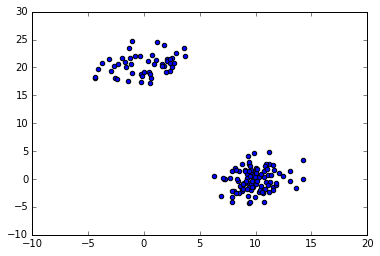

In [10]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0, 0], [[3, 1, 1], [1, 4, 4], [1, 4, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20, 20], [[3, 1, 1], [1, 4, 4], [1, 4, 4]], size=[50,])
X = np.concatenate((a, b),)
print X.shape  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [11]:
a

array([[  9.58646581,   0.61210415,   0.61210415],
       [ 12.49251754,   0.58656714,   0.58656714],
       [  7.73217404,   0.25084625,   0.25084625],
       [  9.2387632 ,   0.83595312,   0.83595312],
       [  9.08348682,   1.53537721,   1.53537721],
       [  8.72435876,  -1.44518459,  -1.44518459],
       [  8.03466272,  -2.1131364 ,  -2.1131364 ],
       [  9.44231799,  -0.74465644,  -0.74465644],
       [  8.39695402,  -0.39945836,  -0.39945836],
       [  9.77235001,  -1.44061794,  -1.44061794],
       [  9.73121363,   1.32251126,   1.32251126],
       [ 11.23333372,   2.64386112,   2.64386112],
       [ 11.25010847,  -0.76034733,  -0.76034733],
       [ 10.95183661,   2.67228964,   2.67228964],
       [  9.0019016 ,  -0.65256626,  -0.65256626],
       [  9.76077528,   0.68822104,   0.68822104],
       [ 13.10749401,   1.36513381,   1.36513381],
       [  9.45484543,   2.66244548,   2.66244548],
       [  9.3671905 ,   4.16947161,   4.16947161],
       [  9.05654708,  -0.70763

In [12]:
Z = linkage(X, 'ward')

In [13]:
X

array([[  9.58646581e+00,   6.12104151e-01,   6.12104151e-01],
       [  1.24925175e+01,   5.86567140e-01,   5.86567140e-01],
       [  7.73217404e+00,   2.50846251e-01,   2.50846251e-01],
       [  9.23876320e+00,   8.35953121e-01,   8.35953121e-01],
       [  9.08348682e+00,   1.53537721e+00,   1.53537721e+00],
       [  8.72435876e+00,  -1.44518459e+00,  -1.44518459e+00],
       [  8.03466272e+00,  -2.11313640e+00,  -2.11313640e+00],
       [  9.44231799e+00,  -7.44656440e-01,  -7.44656440e-01],
       [  8.39695402e+00,  -3.99458360e-01,  -3.99458360e-01],
       [  9.77235001e+00,  -1.44061794e+00,  -1.44061794e+00],
       [  9.73121363e+00,   1.32251126e+00,   1.32251126e+00],
       [  1.12333337e+01,   2.64386112e+00,   2.64386112e+00],
       [  1.12501085e+01,  -7.60347326e-01,  -7.60347326e-01],
       [  1.09518366e+01,   2.67228964e+00,   2.67228964e+00],
       [  9.00190160e+00,  -6.52566260e-01,  -6.52566260e-01],
       [  9.76077528e+00,   6.88221040e-01,   6.8822104

In [45]:
Z

array([[  1.05000000e+02,   1.29000000e+02,   4.39237388e-02,
          2.00000000e+00],
       [  7.70000000e+01,   9.70000000e+01,   6.58227632e-02,
          2.00000000e+00],
       [  1.40000000e+01,   1.90000000e+01,   9.51407716e-02,
          2.00000000e+00],
       [  2.80000000e+01,   8.10000000e+01,   1.00726529e-01,
          2.00000000e+00],
       [  3.90000000e+01,   9.90000000e+01,   1.22068716e-01,
          2.00000000e+00],
       [  9.00000000e+00,   3.70000000e+01,   1.30879063e-01,
          2.00000000e+00],
       [  6.00000000e+00,   4.40000000e+01,   1.34123462e-01,
          2.00000000e+00],
       [  1.00000000e+01,   4.60000000e+01,   1.37149757e-01,
          2.00000000e+00],
       [  1.28000000e+02,   1.43000000e+02,   2.02328186e-01,
          2.00000000e+00],
       [  0.00000000e+00,   1.50000000e+01,   2.04869107e-01,
          2.00000000e+00],
       [  5.30000000e+01,   1.51000000e+02,   2.07471941e-01,
          3.00000000e+00],
       [  1.37000000e

In [21]:
v = DictVectorizer(sparse=True)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)

In [25]:
X = X.toarray()
X

array([[ 2.,  0.,  1.],
       [ 0.,  1.,  3.]])

In [26]:
Z = linkage(X, 'ward')

In [20]:
Z

array([[ 0.,  1.,  3.,  2.]])